# Homework 3: Convolutional Neural Networks

Due Wednesday 11/24 at 11:59 pm EST

Download the dataset `cats-notcats` from github (given as a part of the assignment). This dataset has images of cats and images that are not cats (in separate folders). The task is to train a convolutional neural network (CNN) to build a classifier that can classify a new image as either `cat` or `not cat`

1. Load the dataset and create three stratified splits - train/validation/test in the ratio of 70/10/20. 

In [6]:
#Split train and validation into 80:20
import keras as keras

import os
import tensorflow.compat.v2 as tf
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
os.chdir('C:/Users/Ivan/OneDrive/Documents/GitHub/assignment-3-Ivanye2509/data')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r"./cats-notcats/", 
    target_size=(150, 150),
    class_mode='binary', 
    batch_size=16,
    subset='training')

val_generator = train_datagen.flow_from_directory(
    r"./cats-notcats/", 
    target_size=(150, 150),
    class_mode='binary', 
    batch_size=16,
    subset='validation')

Found 4535 images belonging to 2 classes.
Found 1133 images belonging to 2 classes.


2. Create a CNN that has the following hidden layers:

    a. 2D convolution layer with a 3x3 kernel size, has 128 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. Dense layer with 128 dimensions and ReLU as the activation layer

In [7]:
#code here
from keras import layers
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(128, (3, 3), activation = "relu", padding = "same",name = "conv_1", input_shape = (150,150,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu" ,name = "dense_1"))
model.add(Dense(1, activation = "sigmoid" ,name = "output"))
model.compile(optimizer = "adam", loss= "binary_crossentropy", metrics = ["accuracy"])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 720000)            0         
                                                                 
 dropout_1 (Dropout)         (None, 720000)            0         
                                                                 
 dense_1 (Dense)             (None, 128)               92160128  
                                                                 
 output (Dense)              (None, 1)                 129       
                                                      

3. Train the classifier for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [9]:
#code here
history = model.fit(train_generator, steps_per_epoch=100, epochs=20, 
                    validation_data = val_generator, validation_steps = 50,verbose = 1)

Epoch 1/20
100/100 [==============================] - 51s 509ms/step - loss: 1.4277 - accuracy: 0.7674 - val_loss: 0.6452 - val_accuracy: 0.6950
Epoch 2/20
100/100 [==============================] - 49s 492ms/step - loss: 0.4128 - accuracy: 0.8481 - val_loss: 0.5794 - val_accuracy: 0.7325
Epoch 3/20
100/100 [==============================] - 48s 478ms/step - loss: 0.3762 - accuracy: 0.8586 - val_loss: 0.5921 - val_accuracy: 0.7237
Epoch 4/20
100/100 [==============================] - 47s 475ms/step - loss: 0.3716 - accuracy: 0.8656 - val_loss: 0.6276 - val_accuracy: 0.7163
Epoch 5/20
100/100 [==============================] - 48s 477ms/step - loss: 0.3820 - accuracy: 0.8462 - val_loss: 0.5649 - val_accuracy: 0.7400
Epoch 6/20
100/100 [==============================] - 47s 475ms/step - loss: 0.3811 - accuracy: 0.8529 - val_loss: 0.6879 - val_accuracy: 0.7113
Epoch 7/20
100/100 [==============================] - 49s 491ms/step - loss: 0.3582 - accuracy: 0.8644 - val_loss: 0.6520 - val_ac

4. Plot the accuracy and the loss over epochs for train & validation sets

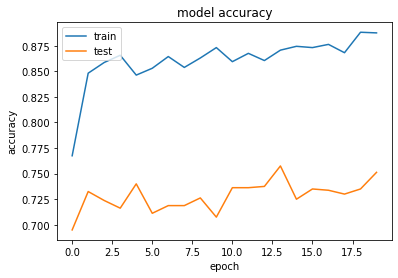

In [11]:
##Accuracy over epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

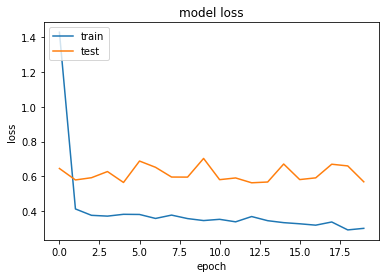

In [12]:
##Loss over epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

5. Add the following layers to (2) before the dense layer:

    a. 2D convolution layer with a 3x3 kernel size, has 64 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. 2D convolution layer with a 3x3 kernel size, has 32 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    d. Max pooling layer of 2x2
    
    e. Dense layer with 256 dimensions and ReLU as the activation layer

In [14]:
#code here
cnn2 = Sequential()
cnn2.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding = "same", name = "conv_1", input_shape = (150,150,3)))
cnn2.add(MaxPooling2D((2, 2),name = "maxpool_1"))
cnn2.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding = "same", name = "conv_2"))
cnn2.add(MaxPooling2D((2, 2),name = "maxpool_2"))
cnn2.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding = "same", name = "conv_3"))
cnn2.add(MaxPooling2D((2, 2),name = "maxpool_3"))
cnn2.add(Flatten())
cnn2.add(Dense(256, activation='relu',name = "dense_1"))
cnn2.add(Dense(128, activation='relu',name = "dense_2"))
cnn2.add(Dense(1, activation = "sigmoid" ,name = "output"))
cnn2.compile(optimizer = "adam", loss= "binary_crossentropy", metrics = ["accuracy"])

6. Train the classifier again for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [17]:
#code here
history2 = cnn2.fit(train_generator, steps_per_epoch=100, epochs=20,
                           validation_data = val_generator, validation_steps = 50, verbose = 1)

Epoch 1/20
100/100 [==============================] - 43s 427ms/step - loss: 0.3870 - accuracy: 0.8573 - val_loss: 0.6304 - val_accuracy: 0.7237
Epoch 2/20
100/100 [==============================] - 43s 430ms/step - loss: 0.3662 - accuracy: 0.8580 - val_loss: 0.6016 - val_accuracy: 0.7250
Epoch 3/20
100/100 [==============================] - 43s 430ms/step - loss: 0.3770 - accuracy: 0.8600 - val_loss: 0.6114 - val_accuracy: 0.7325
Epoch 4/20
100/100 [==============================] - 44s 441ms/step - loss: 0.3590 - accuracy: 0.8687 - val_loss: 0.5731 - val_accuracy: 0.7250
Epoch 5/20
100/100 [==============================] - 45s 447ms/step - loss: 0.3621 - accuracy: 0.8661 - val_loss: 0.6509 - val_accuracy: 0.7287
Epoch 6/20
100/100 [==============================] - 44s 437ms/step - loss: 0.3545 - accuracy: 0.8687 - val_loss: 0.7255 - val_accuracy: 0.7350
Epoch 7/20
100/100 [==============================] - 42s 421ms/step - loss: 0.3328 - accuracy: 0.8787 - val_loss: 0.7663 - val_ac

7. Plot the accuracy and the loss over epochs for train & validation sets

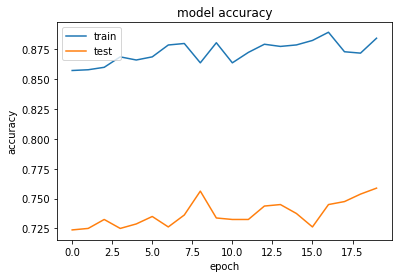

In [18]:
#code here
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

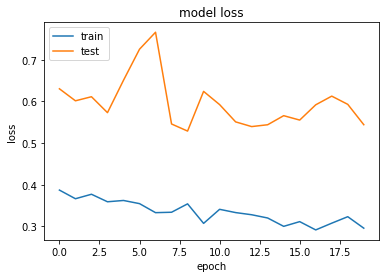

In [19]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()